In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('prepared_data.csv')

In [3]:
df

,DocumentID,Text,Label,LabelType,LabelName,DocumentType,LengthCharacters,HasEmoji,cleaned_text,LabelMapped
0,1,Arrived broken. Manufacturer defect. Two of th...,1,StarRating,1 Star,Review,612,0,arrived broken manufacturer defect two of the ...,-1
1,2,the cabinet dot were all detached from backing...,1,StarRating,1 Star,Review,56,0,the cabinet dot were all detached from backing...,-1
2,3,I received my first order of this product and ...,1,StarRating,1 Star,Review,206,0,i received my first order of this product and ...,-1
3,4,This product is a piece of shit. Do not buy. D...,1,StarRating,1 Star,Review,145,0,this product is a piece of shit do not buy doe...,-1
4,5,went through 3 in one day doesn't fit correct ...,1,StarRating,1 Star,Review,91,0,went through in one day doesnt fit correct and...,-1
...,...,...,...,...,...,...,...,...,...,...
255077,255079,@Racalto_SK ok good to know. Punting at MetLif...,1,Sentiment,Positive,Tweet,94,0,racaltosk ok good to know punting at metlife i...,1
255078,255080,everyone who sat around me at metlife was so a...,0,Sentiment,Neutral,Tweet,99,0,everyone who sat around me at metlife was so a...,0
255079,255081,what giants or niners fans would wanna go to t...,0,Sentiment,Neutral,Tweet,78,0,what giants or niners fans would wanna go to t...,0
255080,255082,Anybody want a ticket for tomorrow Colombia vs...,1,Sentiment,Positive,Tweet,63,0,anybody want a ticket for tomorrow colombia vs...,1


Accuracy of Emoticon-Based Sentiment Analysis: 41.46%
Number of mismatched sentiments: 9713
                                                    Text emoticons  \
3040              Broke while trying to change sheets :/      [:/]   
4845   We returned them after a couple of days :/ Two...      [:/]   
6525   for a 24, 26, and 28” bundles are thin very di...      [:/]   
6846   I am seriously disappointed. :/ I bought these...      [:/]   
8927   Horrible quality. The velcro sticking part of ...      [:/]   
11984  I'm not sure this product is the real thing :/...      [:/]   
12343  How can you fuck this product up? Well they ma...      [:)]   
12596  was already used when i got it and one of the ...      [:/]   
12657  Lost the product on the first day of wearing i...  [:(, :/]   
12917     Broke in less than a month :/ brittle plastic.      [:/]   

       emoticons_sentiment  LabelMapped  
3040                   1.0           -1  
4845                   1.0           -1  
6525       

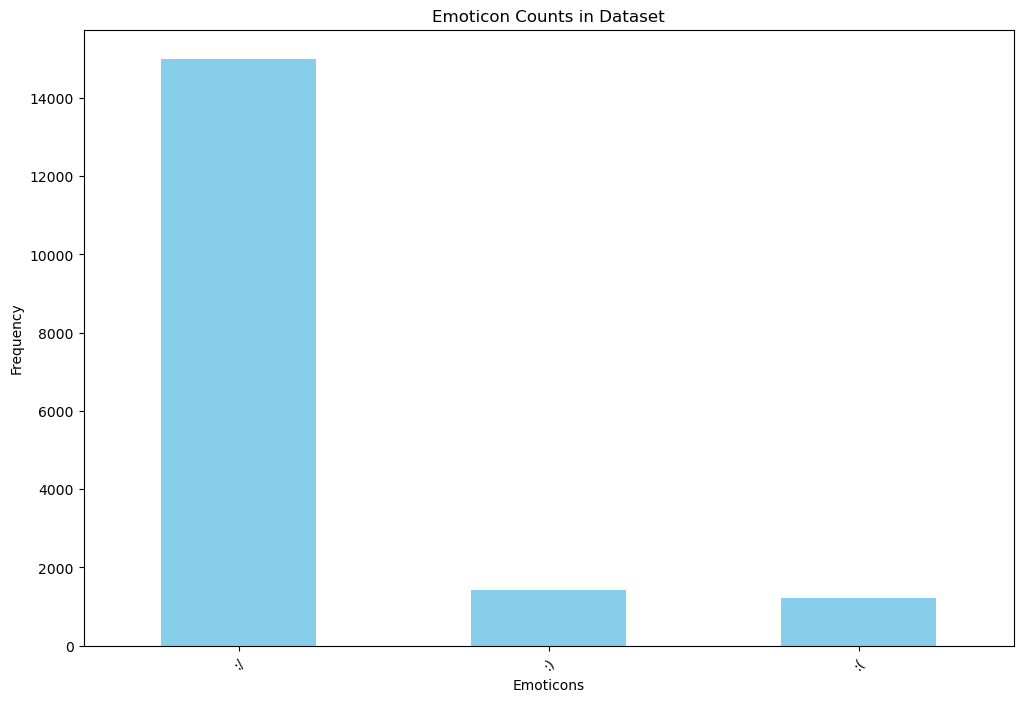

Frequency of each emoticon:
:/    14996
:)     1411
:(     1215
Name: emoticons, dtype: int64


In [14]:
# Define the pattern to match emoticons with the updated list
emoticon_pattern = re.compile(
    r"(:/|:\)|:\()"
)

# Define updated emoticon sentiments
emoticon_sentiments = {
    ":)": 1,
    ":(": -1,
    ":/": 1
}

# Function to find emoticons in the text
def find_emoticons(text):
    emoticons_found = emoticon_pattern.findall(text)
    return emoticons_found if emoticons_found else None

# Function to assign sentiment values based on emoticons
def assign_sentiment(emoticons):
    if emoticons is None:
        return None
    # Get the sentiment of the last emoticon found
    last_emoticon = emoticons[-1]
    sentiment_score = emoticon_sentiments[last_emoticon]
    return sentiment_score

# Apply the functions to find emoticons and assign sentiments
df['emoticons'] = df['Text'].apply(find_emoticons)
df['emoticons_sentiment'] = df['emoticons'].apply(assign_sentiment)

# Filter DataFrame to include only rows with non-null emoticons_sentiment
df_with_emoticons = df.dropna(subset=['emoticons_sentiment'])

# Calculate the accuracy
accuracy = (df_with_emoticons['emoticons_sentiment'] == df_with_emoticons['LabelMapped']).mean()

# Display the accuracy
print(f"Accuracy of Emoticon-Based Sentiment Analysis: {accuracy:.2%}")

# Identify mismatched sentiments
mismatches = df_with_emoticons[df_with_emoticons['emoticons_sentiment'] != df_with_emoticons['LabelMapped']]
print(f"Number of mismatched sentiments: {len(mismatches)}")
print(mismatches[['Text', 'emoticons', 'emoticons_sentiment', 'LabelMapped']].head(10))

# Calculate the frequency of each emoticon
exploded_emoticons = df_with_emoticons['emoticons'].explode()
emoticon_counts = exploded_emoticons.value_counts()

# Plot the frequency of each emoticon
plt.figure(figsize=(12, 8))
emoticon_counts.plot(kind='bar', color='skyblue')
plt.title('Emoticon Counts in Dataset')
plt.xlabel('Emoticons')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Print the frequency of each emoticon
print("Frequency of each emoticon:")
print(emoticon_counts)
